<a href="https://colab.research.google.com/github/Raju1410/Class_IS532E/blob/main/Session5/LSTM_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Define the ticker symbol for Apple
ticker_symbol = 'AAPL'

# Download historical data for Apple stock
apple_data = yf.download(ticker_symbol, start='2023-01-01', end='2024-10-01')

# Display the first few rows of the dataset
print(apple_data.head())

# Save the data to a CSV file
apple_data.to_csv('apple_stock_data.csv')

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [ ]:
apple_df = pd.read_csv('/content/apple_stock_data.csv')

In [ ]:
apple_df.shape

(438, 7)

In [ ]:
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182610,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412216,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800


**Data Pre-Processing**

In [ ]:
#checking for null values
apple_df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       438 non-null    object 
 1   Open       438 non-null    float64
 2   High       438 non-null    float64
 3   Low        438 non-null    float64
 4   Close      438 non-null    float64
 5   Adj Close  438 non-null    float64
 6   Volume     438 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.1+ KB


In [ ]:
#converting the dataype of 'Date' col to 'datetime'
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

In [ ]:
#making the 'Date' col as index
apple_df.set_index('Date', inplace = True)

In [ ]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 438 entries, 2023-01-03 to 2024-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       438 non-null    float64
 1   High       438 non-null    float64
 2   Low        438 non-null    float64
 3   Close      438 non-null    float64
 4   Adj Close  438 non-null    float64
 5   Volume     438 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 24.0 KB


In [ ]:
#sort the indexes
apple_df.sort_index(inplace = True)

<Axes: xlabel='Date'>

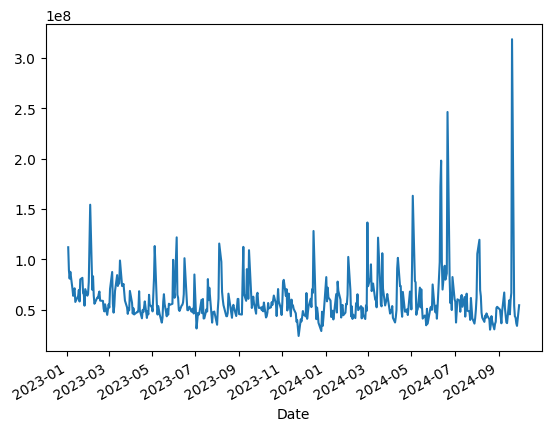

In [ ]:
apple_df['Volume'].plot()

In [ ]:
# Apply log transformation to Volume to stabilize variance
apple_df['Log_Volume'] = np.log(apple_df['Volume'])

In [ ]:
#deleting the original column of volume
apple_df.drop(columns = ['Volume'], inplace = True)

In [ ]:
#sort the indexes
apple_df.sort_index(inplace = True)

In [ ]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,18.535058
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182610,18.305423
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,18.209499
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412216,18.290056
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,18.075240


In [ ]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,18.535058
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182610,18.305423
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,18.209499
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412216,18.290056
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,18.075240


In [ ]:
#normalizing the data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(apple_df[apple_df.columns])

In [ ]:
scaled_values

array([[3.86529998e-02, 2.85948957e-02, 0.00000000e+00, 4.55401156e-04,
        4.47521227e-04, 5.95746880e-01],
       [7.96593921e-03, 8.13088824e-03, 8.35478955e-03, 1.22040422e-02,
        1.19927142e-02, 5.06882889e-01],
       [1.01384555e-02, 0.00000000e+00, 5.41685620e-03, 0.00000000e+00,
        0.00000000e+00, 4.69762593e-01],
       ...,
       [9.16900577e-01, 9.20244877e-01, 9.29489600e-01, 9.33515461e-01,
        9.36504643e-01, 1.62912597e-01],
       [9.27401200e-01, 9.29563388e-01, 9.46841779e-01, 9.35974377e-01,
        9.38943713e-01, 1.34305005e-01],
       [9.41703604e-01, 9.61355785e-01, 9.68417164e-01, 9.83424343e-01,
        9.86010706e-01, 3.16898598e-01]])

In [ ]:
#converting the array into dataframe
apple_scaled_df = pd.DataFrame(scaled_values, columns = apple_df.columns, index = apple_df.index)

In [ ]:
apple_scaled_df.head()

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2023-01-03,0.038653,0.028595,0.000000,0.000455,0.000448,0.595747
2023-01-04,0.007966,0.008131,0.008355,0.012204,0.011993,0.506883
2023-01-05,0.010138,0.000000,0.005417,0.000000,0.000000,0.469763
2023-01-06,0.000000,0.023022,0.006610,0.041894,0.041169,0.500936
2023-01-09,0.040373,0.051526,0.052516,0.046721,0.045912,0.417807


**3. Plotting the Columns**

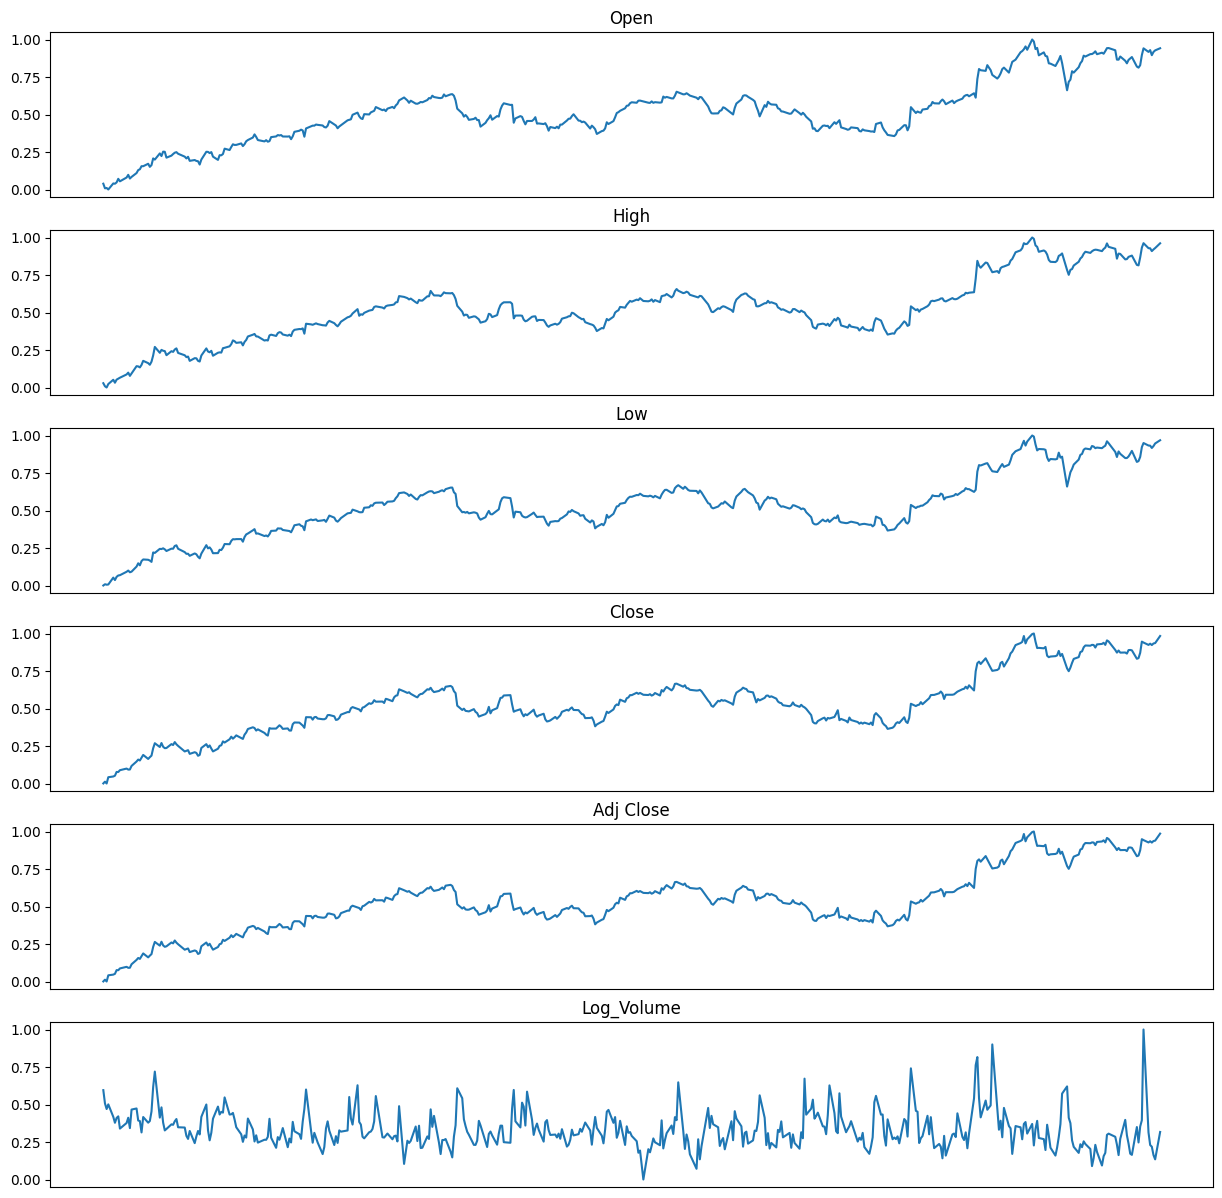

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, apple_scaled_df.columns):
  ax.plot(apple_scaled_df[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

**4. Create the Sliding Window Sequences**

In [ ]:
window_size = 60

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(apple_scaled_df, window_size)

In [ ]:
X.shape, y.shape

((378, 60, 6), (378, 6))

In [ ]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((302, 60, 6), (302, 6), (76, 60, 6), (76, 6))

In [ ]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(60, 6, 6)

In [ ]:
model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [ ]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - RootMeanSquaredError: 0.3282 - loss: 0.1164 - val_RootMeanSquaredError: 0.1950 - val_loss: 0.0380
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - RootMeanSquaredError: 0.1659 - loss: 0.0276 - val_RootMeanSquaredError: 0.0927 - val_loss: 0.0086
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - RootMeanSquaredError: 0.1296 - loss: 0.0168 - val_RootMeanSquaredError: 0.1065 - val_loss: 0.0113
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - RootMeanSquaredError: 0.1459 - loss: 0.0213 - val_RootMeanSquaredError: 0.0920 - val_loss: 0.0085
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - RootMeanSquaredError: 0.1237 - loss: 0.0154 - val_RootMeanSquaredError: 0.0958 - val_loss: 0.0092
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - RootMeanSquaredError: 0.1201 - loss: 0.0145 - val_RootMeanSquaredError: 0.0927 - val_loss: 0.0086
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - RootMeanSquaredError: 0.1249 - 

In [ ]:
# Making predictions on the test data
predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step


In [ ]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

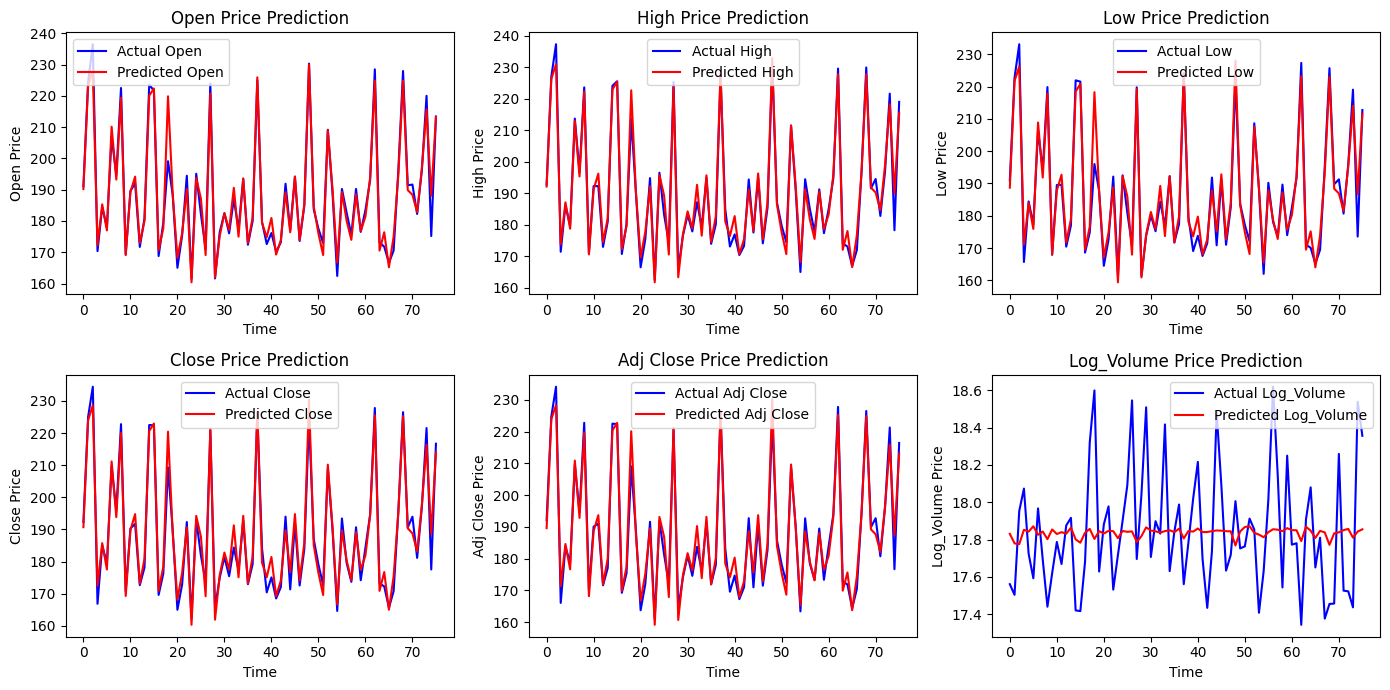

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 7))

for i, col in enumerate(apple_scaled_df.columns):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()